#### Credit Scoring and Segmentation

- [x] Credit scoring is a statistical analysis performed by lenders and financial institutions to access a person's creditworthiness. Lenders use credit scoring, among other things, to decide on whether to extend or deny credit.

- [x] Credit Segmentation refers to the process of dividing the customers into groups based on their credit behavior. The customers are divided into different segments based on their credit score, credit history, and other factors.

- [x] The goal of this project is to segment customers into different groups based on their credit behavior.

- [x] You can access the dataset via this link here https://statso.io/credit-scoring-case-study/
or you can download it from the data folder in this repository.

#### Overview

Credit scoring aims to determine the creditworthiness of individuals based on their credit profiles. By analyzing factors such as payment history, credit utilization ratio, and number of credit accounts, we can assign a credit score to each individual, providing a quantitative measure of their creditworthiness.

The given dataset includes features such as age, gender, marital status, education level, employment status, credit utilization ratio, payment history, number of credit accounts, loan amount, interest rate, loan term, type of loan, and income level.

Your task is to calculate credit scores and segment customers based on their credit scores to gain insights into different customer groups.

In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [2]:
#load dataset
data = pd.read_csv('credit_scoring.csv')
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [3]:
data.shape, data.columns

((1000, 12),
 Index(['Age', 'Gender', 'Marital Status', 'Education Level',
        'Employment Status', 'Credit Utilization Ratio', 'Payment History',
        'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
        'Loan Term', 'Type of Loan'],
       dtype='object'))

### Description of all features in the data:

1. Age: represents the age of the customer
2. Gender: represents gender of the customer
3. Marital status: represents whether the customer is married or single
4. Education level: represents the education level of the customer
5. Employment status: represents whether the customer is employed or unemployed
6. Credit utilization Ratio: represents the percentage of credit limit that a customer is utilizing
7. Payment history: represents the payment history of the customer, taking into account factors such as on-time payments, delayed payments, and missed payments.
8. Number of Credit Accounts: represents the number of credit accounts that a customer has.
9. Loan Amount: represents the total amount of loan that a customer has taken.
10. Interest Rate: represents the interest rate on the loan.
11. Loan Term: represents the duration of the loan.
12. Type of Loan: represents the type of loan taken by the customer like "Personal Loan", "Home Loan", "Auto Loan", etc.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


#### data info
* the above dataset indicates that it has 1000 rows and 12 columns
* the dataset has 3 float columns, 4 integer columns and 5 object columns


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,4.270200e+01,1.326677e+01,20.00,3.100000e+01,42.000,54.00,65.00
Credit Utilization Ratio,1000.0,5.099500e-01,2.910567e-01,0.00,2.500000e-01,0.530,0.75,1.00
Payment History,1000.0,1.452814e+03,8.279341e+02,0.00,7.637500e+02,1428.000,2142.00,2857.00
Number of Credit Accounts,1000.0,5.580000e+00,2.933634e+00,1.00,3.000000e+00,6.000,8.00,10.00
Loan Amount,1000.0,2.471401e+06,1.387047e+06,108000.00,1.298000e+06,2437500.000,3653250.00,4996000.00
Interest Rate,1000.0,1.068660e+01,5.479058e+00,1.01,6.022500e+00,10.705,15.44,19.99
Loan Term,1000.0,3.712800e+01,1.743627e+01,12.00,2.400000e+01,36.000,48.00,60.00


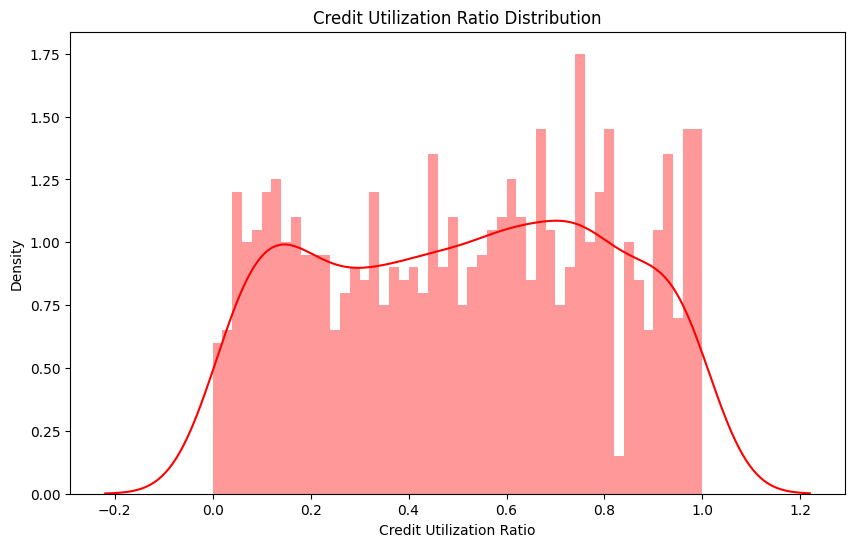

In [8]:
#look at the distribution of credit utilization ration in the data
plt.figure(figsize=(10,6))
sns.distplot(data['Credit Utilization Ratio'],bins=50,color='red')
plt.title('Credit Utilization Ratio Distribution')
plt.show()

#### Interpretation of the credit utilization ratio distribution
#### Ans: the credit utilization ratio distribution is right skewed, meaning that most of the customers have a low credit utilization ratio

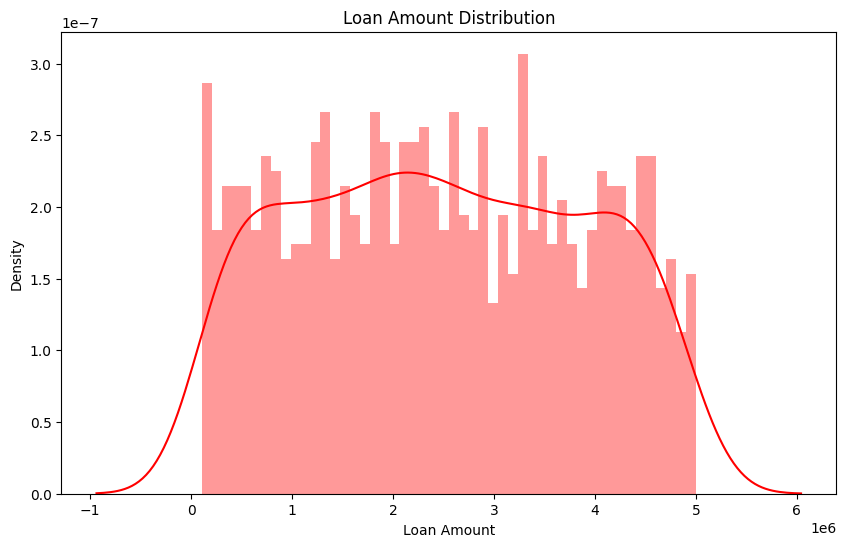

In [9]:
# look at the distribution of the loan amount in the data
plt.figure(figsize=(10,6))
sns.distplot(data['Loan Amount'],bins=50,color='red')
plt.title('Loan Amount Distribution')
plt.show()

#### interprete the distribution of loan amount in the data
#### ans: the distribution is skewed to the right, meaning that most of the loan amount is less than 10000



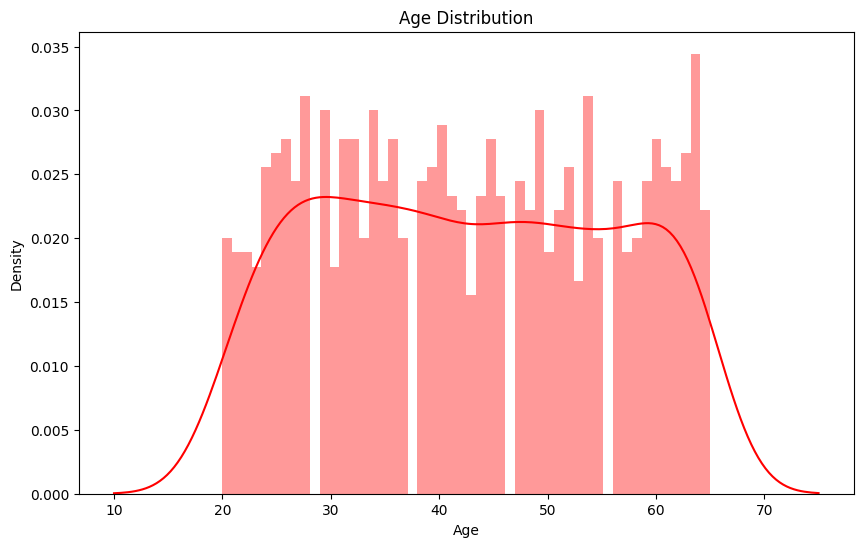

In [11]:
# look at the distribution of the age in the data
plt.figure(figsize=(10,6))
sns.distplot(data['Age'],bins=50,color='red')
plt.title('Age Distribution')
plt.show()

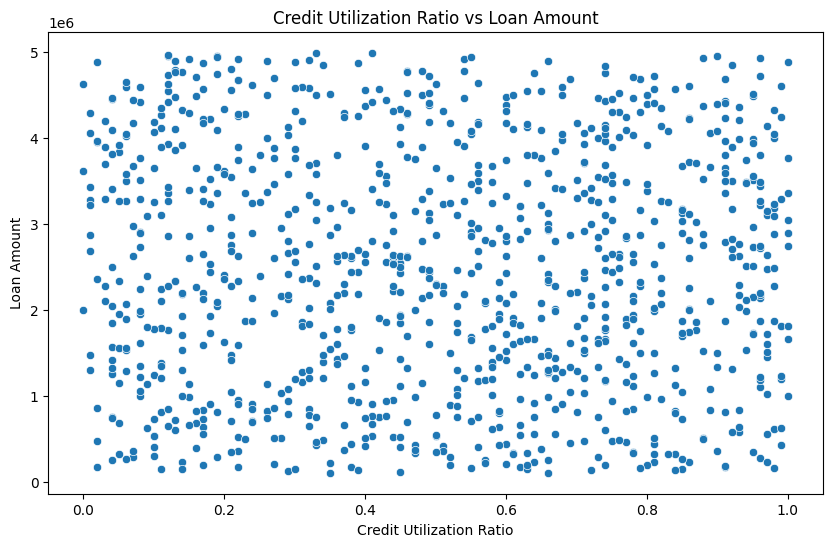

In [12]:
#investigate the relationship between the credit utilization ratio and the loan amount
plt.figure(figsize=(10,6))
sns.scatterplot(x='Credit Utilization Ratio',y='Loan Amount',data=data)
plt.title('Credit Utilization Ratio vs Loan Amount')
plt.show()

In [14]:
# create a numeric dataframe and check for correlation
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
Age,1.000000,0.001308,-0.003114,-0.050672,0.034114,0.032867,0.021395
Credit Utilization Ratio,0.001308,1.000000,0.002114,-0.001842,-0.014918,0.048237,-0.022924
Payment History,-0.003114,0.002114,1.000000,0.025022,-0.019084,-0.017618,-0.045532
Number of Credit Accounts,-0.050672,-0.001842,0.025022,1.000000,0.032232,-0.001083,0.012794
Loan Amount,0.034114,-0.014918,-0.019084,0.032232,1.000000,0.045288,0.014283
Interest Rate,0.032867,0.048237,-0.017618,-0.001083,0.045288,1.000000,0.028190
Loan Term,0.021395,-0.022924,-0.045532,0.012794,0.014283,0.028190,1.000000


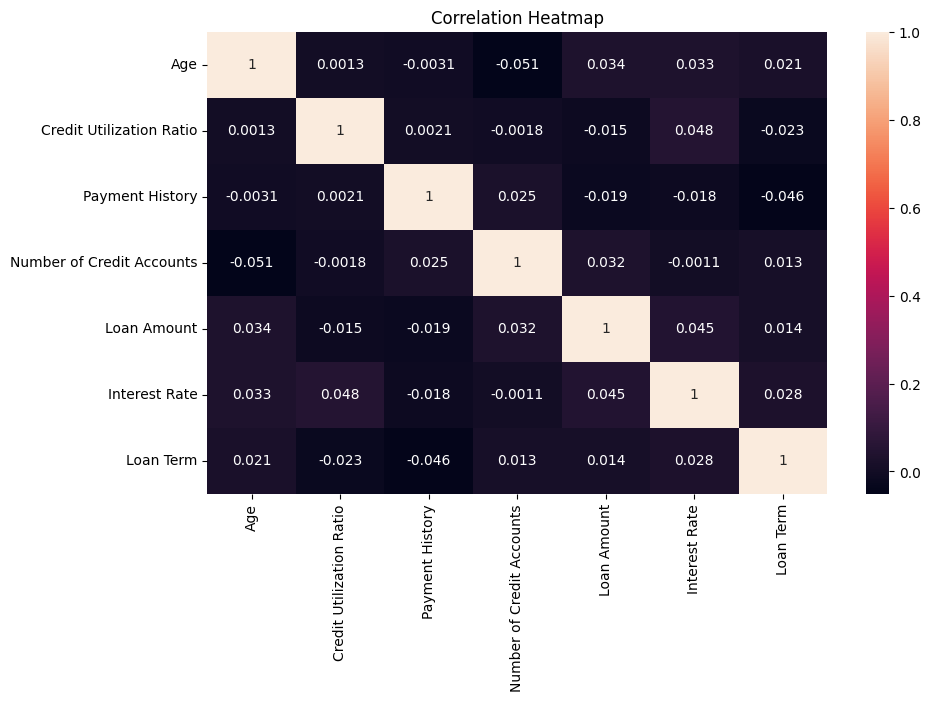

In [15]:
# lets plot the correlation heatmap for the numeric data
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# check if there are any missing values in the data
data.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [19]:
# check for outliers in the data
def outliers(data):
    for i in data.columns:
        if data[i].dtype=='int64' or data[i].dtype=='float64':
            sns.boxplot(data[i])
            plt.show()

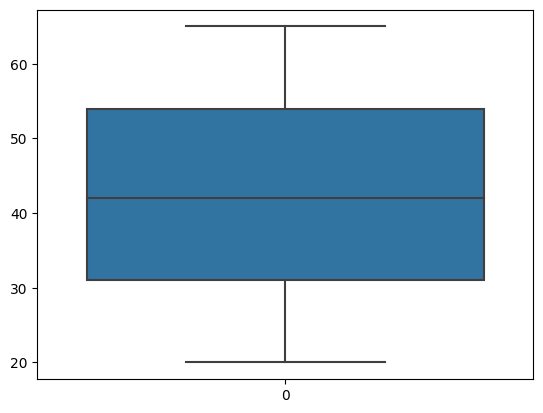

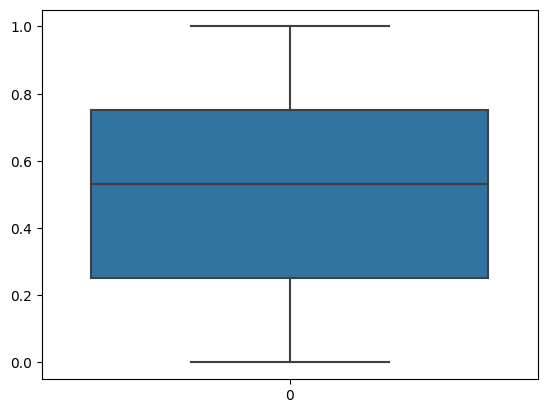

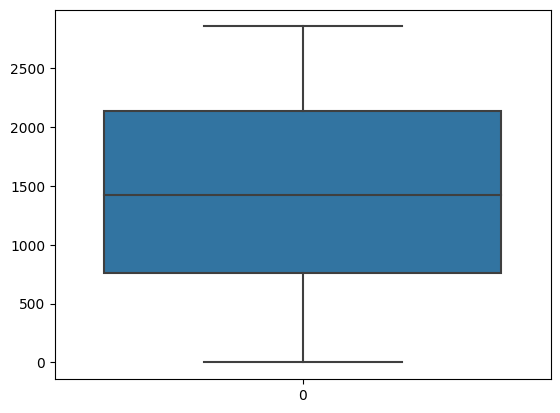

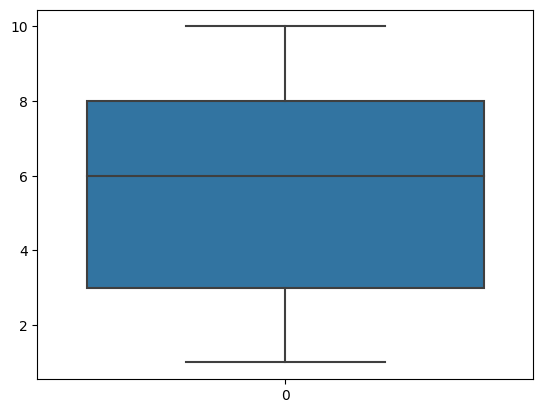

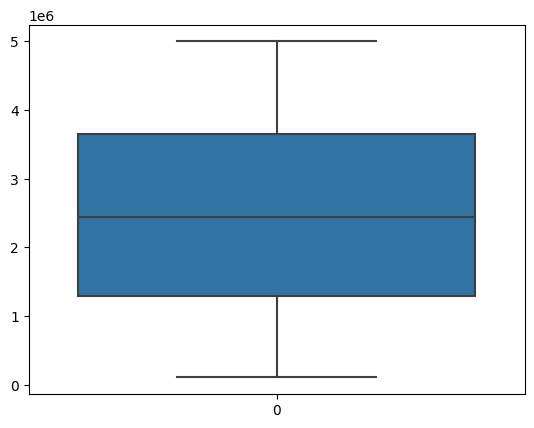

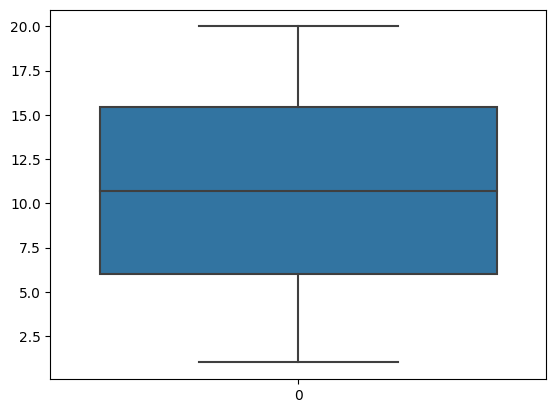

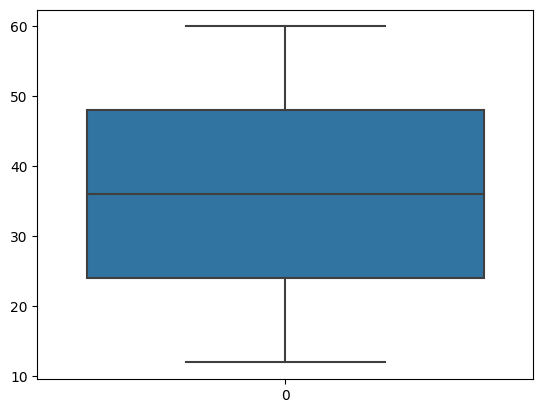

In [20]:
outliers(data)

In [45]:
# check how many males and females in Gender column
data['Gender'].value_counts()

Gender
Male      501
Female    499
Name: count, dtype: int64

In [46]:
data['Marital Status'].value_counts()

Marital Status
Married     350
Divorced    326
Single      324
Name: count, dtype: int64

In [21]:
def numb_outliers(data):
    for i in data.columns:
        if data[i].dtype =='float64' or data[i].dtype=='int64':
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr = q3-q1
            ub = q3 + 1.5*iqr
            lb = q1 - 1.5*iqr
            print('The number of outliers in',i,'is',data[(data[i]>ub) | (data[i]<lb)][i].count())
numb_outliers(data) 


The number of outliers in Age is 0
The number of outliers in Credit Utilization Ratio is 0
The number of outliers in Payment History is 0
The number of outliers in Number of Credit Accounts is 0
The number of outliers in Loan Amount is 0
The number of outliers in Interest Rate is 0
The number of outliers in Loan Term is 0


In [22]:
# implement the FICO score method to calculate credit scores
def fico_score(data):
    data['FICO Score'] = (data['Credit Utilization Ratio']*10) + (data['Age']/10)
    return data


In [23]:
fico_score(data)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,FICO Score
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan,8.2
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan,4.5
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan,5.2
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan,7.0
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan,13.3
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan,14.1
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan,8.1
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan,8.3


In [24]:
#display fico scores in terms of percentages
def fico_score_percent(data):
    data['FICO Score Percent'] = (data['FICO Score']/data['FICO Score'].sum())*100
    return data
fico_score_percent(data)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,FICO Score,FICO Score Percent
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan,8.2,0.087516
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan,4.5,0.048027
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan,5.2,0.055498
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan,7.0,0.074709
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan,13.1,0.139812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan,13.3,0.141947
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan,14.1,0.150485
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan,8.1,0.086449
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan,8.3,0.088583


In [25]:
###remove the fico score percent column
data.drop('FICO Score Percent',axis=1,inplace=True)
data

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,FICO Score
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan,8.2
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan,4.5
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan,5.2
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan,7.0
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan,13.3
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan,14.1
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan,8.1
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan,8.3


In [26]:
data.drop('FICO Score',axis=1,inplace=True)
data

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan


In [28]:
#implement the FICO SCORE METHOD to calculate credit scores
#define the mapping for categorical features
education_map = {'High School':1,'Bachelor':2,'Master':3,'PhD':4}
employment_status = {'Unemployed':0,'Employed':1,'Self-Employed': 2}
#apply mapping to categorical features
data['Education Level'] = data['Education Level'].map(education_map)
data['Employment Status'] = data['Employment Status'].map(employment_status)
#calculate credit scores using the complete FICO formula
credit_scores = []
for index, row in data.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']
    #Apply the FICO formula to calculare credit scores
    credit_score = (payment_history*0.35) + (credit_utilization_ratio*0.3) + (number_of_credit_accounts*0.15) + (education_level*0.1) + (employment_status*0.1)
    credit_scores.append(credit_score)
#add the credit scores as a new column to the dataframe
data['Credit Score'] = credit_scores
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


#### FICO  stand for Fair Isaac Corporation, is wide;y used credit scroing system that helps assess the creditworthiness of individuals. The FICO score ranges from 300 to 850, with a higher score indicating a lower credit risk.
1. Poor (300-579): Individuals with scores in this range are considered to have poor credit and may face difficulties in obtaining credit or loans. They may have a history of missed payments, high credit utilization, or derogatory marks on their credit report.

2. Fair (580-669): Scores in this range indicate a fair credit profile. While individuals in this range may qualify for credit, they may still face higher interest rates and less favorable terms compared to those with higher scores.

3. Good (670-739): A good credit score suggests responsible credit behavior and indicates that the individual is less risky to lenders. They are likely to have a history of on-time payments, low credit utilization, and a good mix of credit types.

4. Very Good (740-799): This range represents a very good credit profile, and individuals with scores in this range are considered to be low credit risks. They are likely to receive better interest rates and terms on loans and credit products.

5. Excellent (800-850): Scores in this range indicate an excellent credit profile. Individuals with these scores are typically seen as highly creditworthy and may qualify for the most favorable interest rates and terms on credit and loan product

##### Segmentation Based on Credit Scores

In [34]:
from sklearn.cluster import KMeans

X = data[['Credit Score']]
kmeans =KMeans(n_clusters=4,n_init=10,random_state=15).fit(X)

In [35]:
data['Segment'] = kmeans.labels_

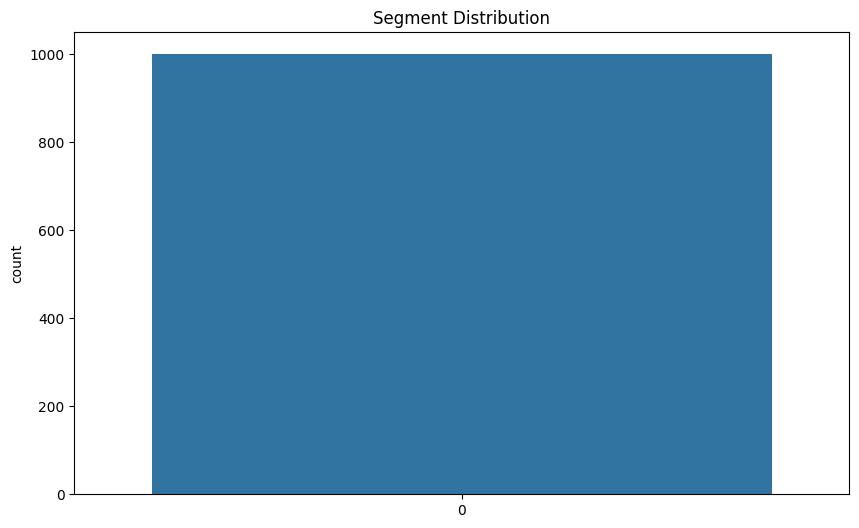

In [36]:
#convert the 'Segment' column to categorical data type
data['Segment'] = data['Segment'].astype('category')
#visualize the distribution of the segments
plt.figure(figsize=(10,6))
sns.countplot(data['Segment'])
plt.title('Segment Distribution')
plt.show()

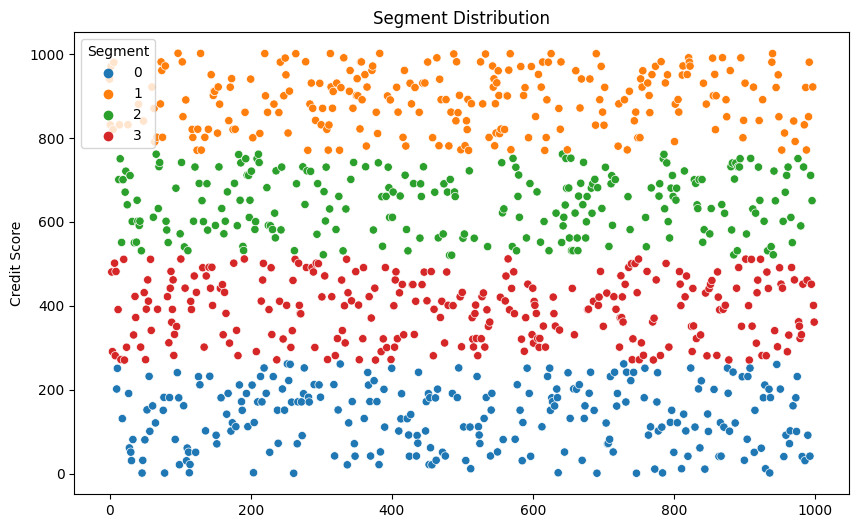

In [37]:
#use seaborn to visualize segments and x=data.index, y='Credit Score', data=data
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.index,y='Credit Score',hue='Segment',data=data)
plt.title('Segment Distribution')
plt.show()

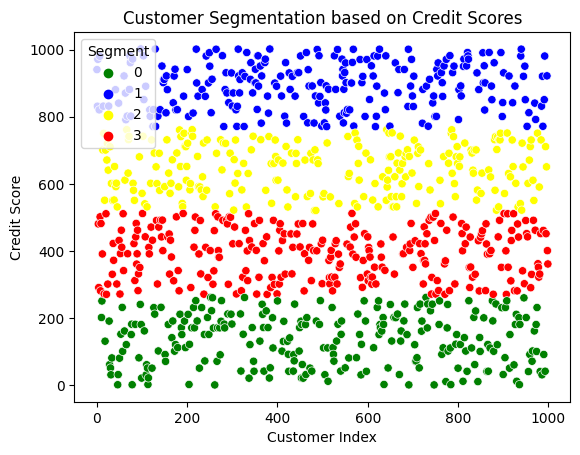

In [38]:
# Set the color palette for the segments
palette = ['green', 'blue', 'yellow', 'red']

# Create a scatter plot using seaborn
sns.scatterplot(data=data, x=data.index, y='Credit Score', hue='Segment', palette=palette)

# Set the axis labels and title
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.title('Customer Segmentation based on Credit Scores')

# Show the plot
plt.show()

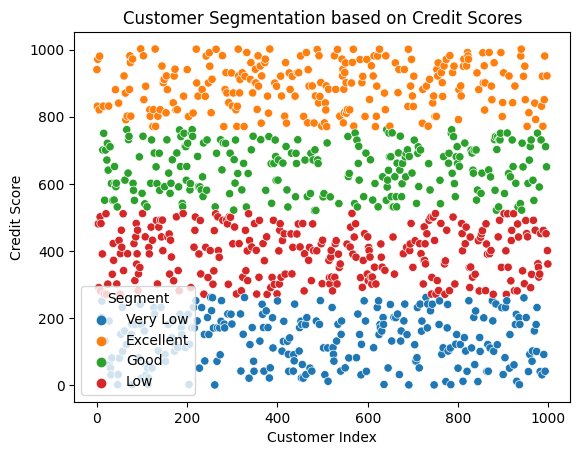

In [39]:
#name segments based on the above clusters and have a look at the data
data['Segment'] = data['Segment'].map({0:'Very Low', 3:'Low', 2:'Good',1:'Excellent'})

#convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')
#visualize the segments x=data.index , y='Credit Score'
sns.scatterplot(x= data.index, y='Credit Score', hue="Segment", data=data)
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.title('Customer Segmentation based on Credit Scores')
plt.show()

In [40]:
# Get the number of people in each segment
data['Segment'].value_counts()

Segment
Low          269
Very Low     250
Excellent    243
Good         238
Name: count, dtype: int64

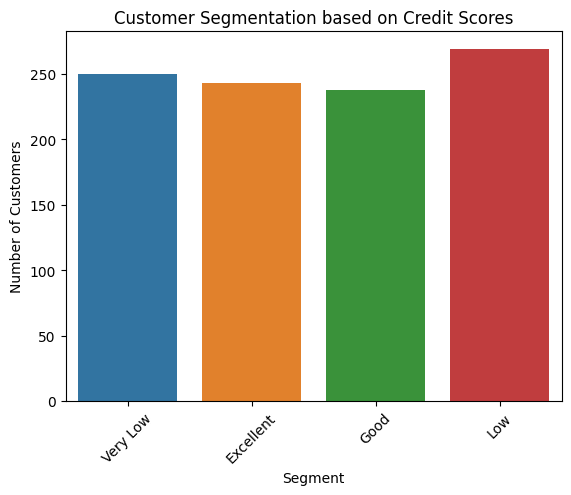

In [44]:
#plot the segment column for each feature in the data and use value_counts()
segment_counts = data['Segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation based on Credit Scores')
plt.xticks(rotation=45)
plt.show()

#### Building a credit scoring model

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
#perform one hot encoding on the categorical columns
data = pd.get_dummies(data, columns =['Gender','Marital Status','Type of Loan'],drop_first=True)

In [50]:
#split the data into train and test sets
X = data.drop(['Segment'],axis=1)
y = data['Segment']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)
#initialize and train the random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [51]:
#evaluate the performance of the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00        54
        Good       1.00      1.00      1.00        45
         Low       1.00      1.00      1.00        51
    Very Low       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [52]:
#dump the clf model using joblib
import joblib
joblib.dump(clf,'rfc.joblib')




['rfc.joblib']

In [53]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[54,  0,  0,  0],
       [ 0, 45,  0,  0],
       [ 0,  0, 51,  0],
       [ 0,  0,  0, 50]], dtype=int64)

In [56]:
#evalaute random forest further
from sklearn.model_selection import GridSearchCV
#initialize the classifier
clf = RandomForestClassifier()
#set the parameter grid
param_grid = {'n_estimators':[100,200,300,400,500], 'max_depth':[3,4,5,6,7,8,9,10]}
#initialize the grid search object
grid_search = GridSearchCV(clf,param_grid=param_grid,cv=5)
#fit the grid search object to the training data
grid_search.fit(X_train,y_train)
#extract the best estimator
best_clf = grid_search.best_estimator_
#make predictions using the best estimator
y_pred = best_clf.predict(X_test)
#evaluate the performance of the classifier
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00        54
        Good       1.00      1.00      1.00        45
         Low       1.00      1.00      1.00        51
    Very Low       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

